<a href="https://colab.research.google.com/github/WanDz03/SMJE3203/blob/main/Wan_CNN_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount the gdrive to Colab Notebook**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
E: Package 'module-init-tools' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=None&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force


KeyboardInterrupt: ignored

**Import Package**

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

**Set Parameter & Download Dataset**

In [34]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


**Normalize Dataset and Create One Hot Encoding for Y train and Y test**
# Answer Question 1

In [35]:
from keras.utils import np_utils
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
x_test shape: (10000, 28, 28, 1)
10000 test samples


In [36]:
print(y_train)

[5 0 4 ... 5 6 8]


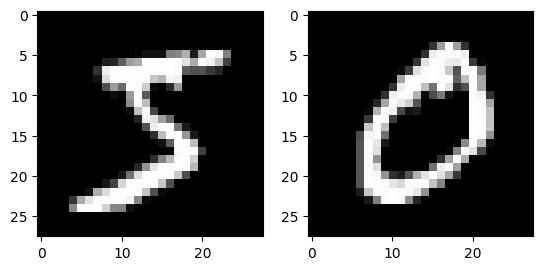

In [37]:
plt.subplot(121)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

Change to one-hot **encoding**

In [38]:
from keras.utils import to_categorical

y_train_one = to_categorical(y_train, num_classes)
y_test_one = to_categorical(y_test, num_classes)

In [39]:
print(y_train_one.shape,y_train_one[0:2])

(60000, 10) [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Create CNN Model**

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


**Compile Model and Train Model**

In [41]:
import tensorflow as tf
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

model.fit(x_train, y_train_one,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test_one))
score = model.evaluate(x_test, y_test_one, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 6s 10ms/step - loss: 0.2650 - accuracy: 0.9207 - val_loss: 0.0649 - val_accuracy: 0.9794
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 0.1303 - accuracy: 0.9612 - val_loss: 0.0487 - val_accuracy: 0.9853
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 0.1158 - accuracy: 0.9660 - val_loss: 0.0496 - val_accuracy: 0.9851
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 0.1086 - accuracy: 0.9678 - val_loss: 0.0431 - val_accuracy: 0.9861
Epoch 5/12
469/469 [==============================] - 4s 9ms/step - loss: 0.1025 - accuracy: 0.9689 - val_loss: 0.0431 - val_accuracy: 0.9859
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0991 - accuracy: 0.9709 - val_loss: 0.0462 - val_accuracy: 0.9854
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0896 - accuracy: 0.9738 - val_loss: 0.0417 - val_accuracy: 0.9866
Epoch

**Plot Test Dataset**

(28, 28, 1)


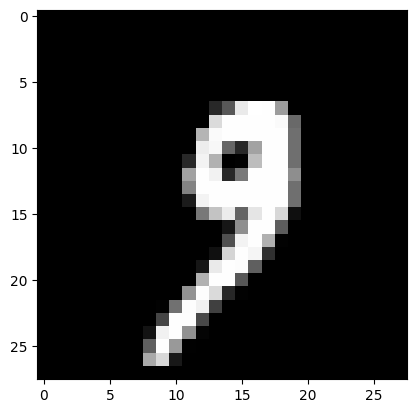

In [43]:
m=1000
print(x_test[m].shape)

# Show the test image
plt.imshow(x_test[m].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.show()

**Predict, Save and Load Model**
# Answer Question 2, 3 and 4

(10000, 28, 28, 1)
(28, 28, 1)


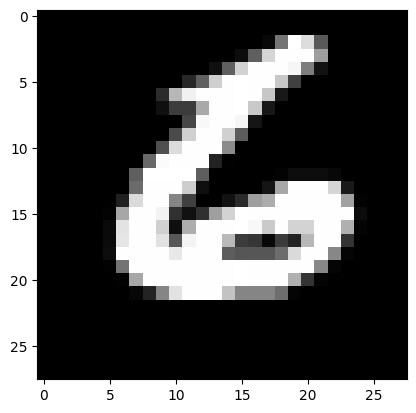

1/1 [==============================] - 0s 142ms/step
Prediction is: [6]


In [44]:
index_num = 10000-1
print(x_test.shape)
print(x_test[index_num].shape)

# Show the test image
plt.imshow(x_test[index_num].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.show()

dt = np.reshape(x_test[index_num],[1,28,28,1])
predicted_probabilities = model.predict(dt)

predicted_labels = np.argmax(predicted_probabilities, axis=1)

print("Prediction is:", predicted_labels)

In [ ]:
data = x_test[500]
dt = np.reshape(data, [1, 28, 28, 1])
# Question 2
# Predict dt from the trained model



In [ ]:
# Question 3
# save the model in your google drive folder



In [ ]:
# Question 4
# load the model from your google drive folder

